# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

In [2]:
# Import cities file as dataframe
city_data_df = pd.read_csv("output_data/cities.csv")

# Display sample data
city_data_df.head()

,City_ID,City,Lat,Lng,Max Temp (C),Humidity,Cloudiness,Wind Speed,Country,Date
0,0,Atasū,48.6814,71.6433,-22.31,100,22,2.32,KZ,1676206369
1,1,Punta Arenas,-53.1500,-70.9167,5.62,75,74,7.36,CL,1676205910
2,2,Khovd,48.0056,91.6419,-13.62,92,100,0.25,MN,1676206369
3,3,Riyadh,24.6877,46.7219,28.08,16,100,6.81,SA,1676206146
4,4,Nanortalik,60.1432,-45.2371,-10.83,64,100,7.02,GL,1676206370


### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 626


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
api_key =weather_api_key
base_url= "https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
    
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
  
    city_url =f"{base_url}appid={api_key}&q={city}&units=metric"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
      
        
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city =city_weather["name"]        
        city_lng = city_weather["coord"]["lon"]
        city_lat = city_weather["coord"]["lat"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date =city_weather["dt"]
       
  

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp (C)": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | nhulunbuy
Processing Record 2 of Set 1 | vostok
Processing Record 3 of Set 1 | kodiak
Processing Record 4 of Set 1 | tuatapere
Processing Record 5 of Set 1 | coquimbo
Processing Record 6 of Set 1 | hilo
Processing Record 7 of Set 1 | bandarbeyla
Processing Record 8 of Set 1 | warri
Processing Record 9 of Set 1 | busselton
Processing Record 10 of Set 1 | kaitangata
Processing Record 11 of Set 1 | hun
Processing Record 12 of Set 1 | vaitupu
City not found. Skipping...
Processing Record 13 of Set 1 | bengkulu
Processing Record 14 of Set 1 | linkoping
Processing Record 15 of Set 1 | milton
Processing Record 16 of Set 1 | zhigansk
Processing Record 17 of Set 1 | vaini
Processing Record 18 of Set 1 | puerto ayora
Processing Record 19 of Set 1 | dunedin
Processing Record 20 of Set 1 | maltahohe
Processing Record 21 of Set 1 | fortuna
Processing Record 22 of Set 1 | barrow
Processing Record 23 of Set 1 |

Processing Record 41 of Set 4 | lakes entrance
Processing Record 42 of Set 4 | tiznit
Processing Record 43 of Set 4 | college
Processing Record 44 of Set 4 | richards bay
Processing Record 45 of Set 4 | jaypur
Processing Record 46 of Set 4 | san alberto
Processing Record 47 of Set 4 | otradnoye
Processing Record 48 of Set 4 | zalantun
Processing Record 49 of Set 4 | barawe
City not found. Skipping...
Processing Record 0 of Set 5 | denpasar
Processing Record 1 of Set 5 | urengoy
Processing Record 2 of Set 5 | lebu
Processing Record 3 of Set 5 | pemba
Processing Record 4 of Set 5 | port elizabeth
Processing Record 5 of Set 5 | nantucket
Processing Record 6 of Set 5 | xiaoweizhai
Processing Record 7 of Set 5 | qasigiannguit
Processing Record 8 of Set 5 | north bend
Processing Record 9 of Set 5 | constitucion
Processing Record 10 of Set 5 | port hardy
Processing Record 11 of Set 5 | aldan
Processing Record 12 of Set 5 | qena
Processing Record 13 of Set 5 | saleaula
City not found. Skipping

Processing Record 25 of Set 8 | alto araguaia
Processing Record 26 of Set 8 | suba
Processing Record 27 of Set 8 | ca mau
Processing Record 28 of Set 8 | kerema
Processing Record 29 of Set 8 | snasa
Processing Record 30 of Set 8 | nam tha
City not found. Skipping...
Processing Record 31 of Set 8 | deputatskiy
Processing Record 32 of Set 8 | portobelo
Processing Record 33 of Set 8 | grand gaube
Processing Record 34 of Set 8 | boa vista
Processing Record 35 of Set 8 | bestobe
Processing Record 36 of Set 8 | dodge city
Processing Record 37 of Set 8 | kemijarvi
Processing Record 38 of Set 8 | port-gentil
Processing Record 39 of Set 8 | sorland
Processing Record 40 of Set 8 | te anau
Processing Record 41 of Set 8 | mutsu
Processing Record 42 of Set 8 | inyonga
Processing Record 43 of Set 8 | egvekinot
Processing Record 44 of Set 8 | sovetskiy
Processing Record 45 of Set 8 | leningradskiy
Processing Record 46 of Set 8 | yumen
Processing Record 47 of Set 8 | may pen
Processing Record 48 of Se

Processing Record 14 of Set 12 | kharp
Processing Record 15 of Set 12 | paraiso
Processing Record 16 of Set 12 | najran
Processing Record 17 of Set 12 | sabang
Processing Record 18 of Set 12 | ketchikan
Processing Record 19 of Set 12 | geraldton
Processing Record 20 of Set 12 | york
Processing Record 21 of Set 12 | nuuk
Processing Record 22 of Set 12 | ngama
Processing Record 23 of Set 12 | faya
Processing Record 24 of Set 12 | zonguldak
Processing Record 25 of Set 12 | kenora
Processing Record 26 of Set 12 | valleyview
Processing Record 27 of Set 12 | whithorn
Processing Record 28 of Set 12 | puerto leguizamo
Processing Record 29 of Set 12 | huadian
Processing Record 30 of Set 12 | mendahara
City not found. Skipping...
Processing Record 31 of Set 12 | ajaccio
Processing Record 32 of Set 12 | bolungarvik
City not found. Skipping...
Processing Record 33 of Set 12 | punta alta
Processing Record 34 of Set 12 | hualmay
Processing Record 35 of Set 12 | labuhan
Processing Record 36 of Set 12

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City            571
Lat             571
Lng             571
Max Temp (C)    571
Humidity        571
Cloudiness      571
Wind Speed      571
Country         571
Date            571
dtype: int64

In [6]:
# Display sample data
city_data_df.head()


,City,Lat,Lng,Max Temp (C),Humidity,Cloudiness,Wind Speed,Country,Date
0,Nhulunbuy,-12.2333,136.7667,26.34,94,100,3.60,AU,1676213908
1,Vostok,46.4856,135.8833,-18.89,99,96,2.27,RU,1676213908
2,Saint Paul Harbor,57.7900,-152.4072,-2.27,69,20,5.97,US,1676213910
3,Tuatapere,-46.1333,167.6833,12.08,94,99,1.36,NZ,1676213910
4,Coquimbo,-29.9533,-71.3436,18.85,82,100,4.12,CL,1676213911


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp (C),Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,Nhulunbuy,-12.2333,136.7667,26.34,94,100,3.60,AU,1676213908
1,Vostok,46.4856,135.8833,-18.89,99,96,2.27,RU,1676213908
2,Saint Paul Harbor,57.7900,-152.4072,-2.27,69,20,5.97,US,1676213910
3,Tuatapere,-46.1333,167.6833,12.08,94,99,1.36,NZ,1676213910
4,Coquimbo,-29.9533,-71.3436,18.85,82,100,4.12,CL,1676213911


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

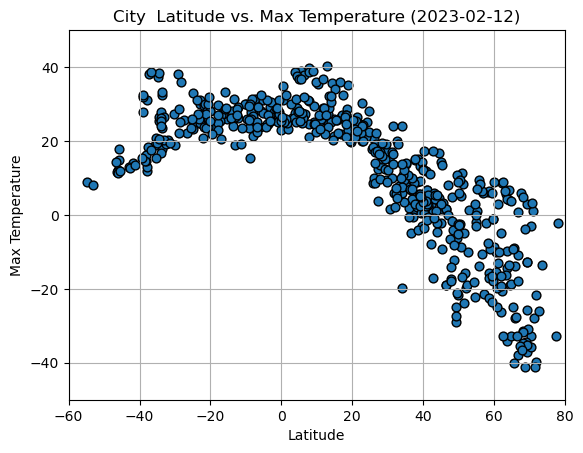

In [9]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp (C)"], marker='o',s=40, edgecolors= "black")
plt.title("City  Latitude vs. Max Temperature (2023-02-12)")

# Incorporate the other graph properties
plt.ylabel("Max Temperature")
plt.xlabel("Latitude")
plt.grid()
plt.ylim(-50,50)
plt.xlim(-60,80)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

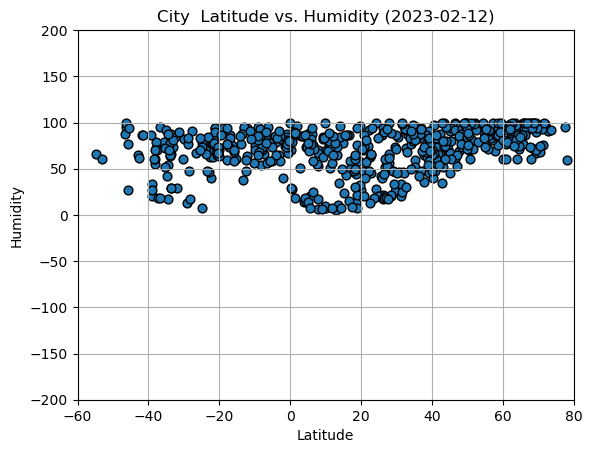

In [10]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker='o',s=40, edgecolors= "black")
plt.title("City  Latitude vs. Humidity (2023-02-12)")

# Incorporate the other graph properties
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid()
plt.ylim(-200,200)
plt.xlim(-60,80)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

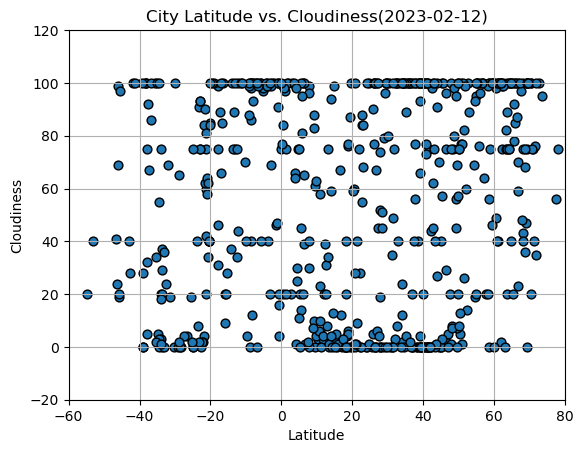

In [11]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker='o',s=40, edgecolors= "black")
plt.title("City Latitude vs. Cloudiness(2023-02-12)")

# Incorporate the other graph properties
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid()
plt.ylim(-20,120)
plt.xlim(-60,80)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

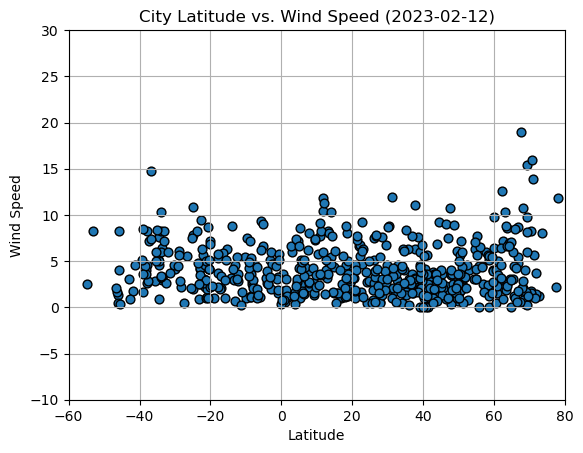

In [12]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker='o',s=40, edgecolors= "black")
plt.title("City Latitude vs. Wind Speed (2023-02-12)")

# Incorporate the other graph properties
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid()
plt.ylim(-10,30)
plt.xlim(-60,80)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


The rvalue is -0.7540024860364503


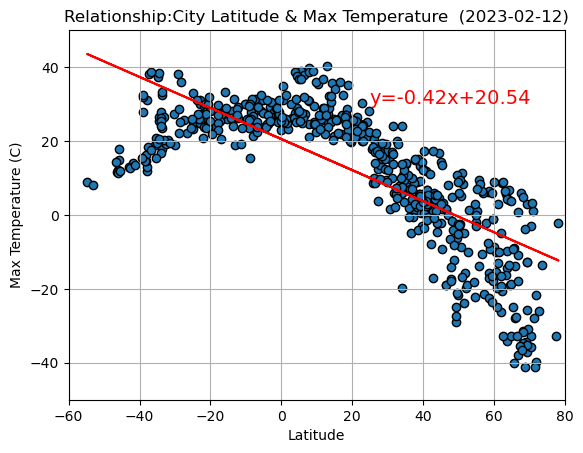

In [13]:
# Define a function to create Linear Regression plots
x_values=city_data_df["Lat"]
y_values=city_data_df["Max Temp (C)"]
plt.scatter(x_values,y_values, edgecolors= "black")
plt.title("Relationship:City Latitude & Max Temperature  (2023-02-12)")
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.grid()
plt.ylim(-50,50)
plt.xlim(-60,80)
(slope, intercept, rvalue,pvalue,std_err) = linregress(x_values,y_values)
slope=round(slope,2)
intercept=round(intercept,2)
line_str=f"y={slope}x+{intercept}"
plt.annotate(line_str,(25,30), fontsize=14,color="red")
predicted_value=x_values*slope+intercept
plt.plot(x_values,predicted_value,"r-")
print("The rvalue is " + str( rvalue))

In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"]>=0.00]
northern_hemi_df.reset_index(inplace=True)
# Display sample data
northern_hemi_df.head()

,City_ID,City,Lat,Lng,Max Temp (C),Humidity,Cloudiness,Wind Speed,Country,Date
0,1,Vostok,46.4856,135.8833,-18.89,99,96,2.27,RU,1676213908
1,2,Saint Paul Harbor,57.7900,-152.4072,-2.27,69,20,5.97,US,1676213910
2,5,Hilo,19.7297,-155.0900,19.60,96,100,4.63,US,1676213911
3,6,Bandarbeyla,9.4942,50.8122,24.71,69,0,7.28,SO,1676213912
4,7,Warri,5.5167,5.7500,38.93,20,14,2.45,NG,1676213912


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"]<=0.00]
southern_hemi_df.reset_index(inplace=True)

# Display sample data
southern_hemi_df.head()

,City_ID,City,Lat,Lng,Max Temp (C),Humidity,Cloudiness,Wind Speed,Country,Date
0,0,Nhulunbuy,-12.2333,136.7667,26.34,94,100,3.60,AU,1676213908
1,3,Tuatapere,-46.1333,167.6833,12.08,94,99,1.36,NZ,1676213910
2,4,Coquimbo,-29.9533,-71.3436,18.85,82,100,4.12,CL,1676213911
3,8,Busselton,-33.6500,115.3333,17.95,66,0,6.38,AU,1676213512
4,9,Kaitangata,-46.2817,169.8464,11.60,95,24,1.65,NZ,1676213913


###  Temperature vs. Latitude Linear Regression Plot

The rvalue is 0.7530189556420207


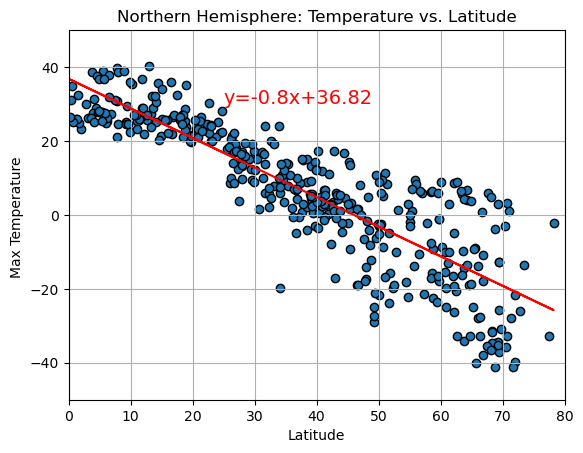

In [16]:
# Linear regression on Northern Hemisphere
x_values=northern_hemi_df["Lat"]
y_values=northern_hemi_df["Max Temp (C)"]
plt.ylabel("Max Temperature ")
plt.xlabel("Latitude")
plt.grid()
plt.ylim(-50,50)
plt.xlim(-0,80)
plt.title("Northern Hemisphere: Temperature vs. Latitude")
plt.scatter(x_values,y_values, edgecolors= "black")
(slope, intercept, rvalue,pvalue,std_err) = linregress(x_values,y_values)
slope=round(slope,2)
intercept=round(intercept,2)
line_str=f"y={slope}x+{intercept}"
plt.annotate(line_str,(25,30), fontsize=14,color="red")
predicted_value=x_values*slope+intercept
plt.plot(x_values,predicted_value,"r-")
print("The rvalue is " + str( rvalue**2))

The rvalue is 0.21278459517968243


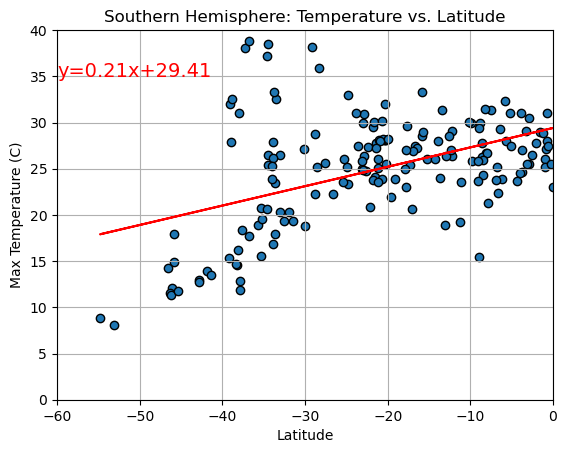

In [17]:
# Linear regression on Southern Hemisphere
x_values=southern_hemi_df["Lat"]
y_values=southern_hemi_df["Max Temp (C)"]
plt.scatter(x_values,y_values, edgecolors= "black")
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.grid()
plt.ylim(0,40)
plt.xlim(-60,0)
plt.title("Southern Hemisphere: Temperature vs. Latitude")
(slope, intercept, rvalue,pvalue,std_err) = linregress(x_values,y_values)
slope=round(slope,2)
intercept=round(intercept,2)
line_str=f"y={slope}x+{intercept}"
plt.annotate(line_str,(-60,35), fontsize=14,color="red")
predicted_value=x_values*slope+intercept
plt.plot(x_values,predicted_value,"r-")
print("The rvalue is " + str( rvalue**2))

### Humidity vs. Latitude Linear Regression Plot

The rvalue is 0.22700608586903034


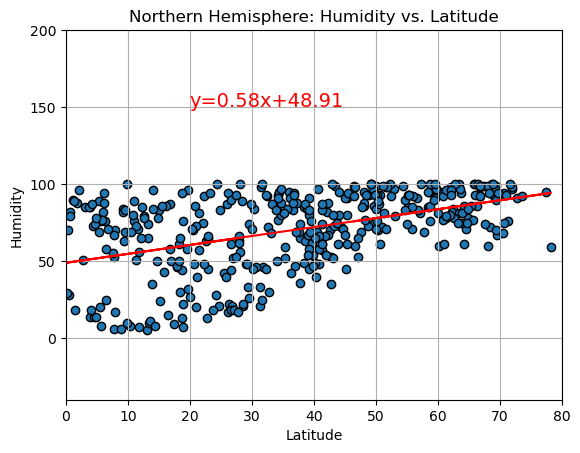

In [18]:
# Northern Hemisphere
x_values=northern_hemi_df["Lat"]
y_values=northern_hemi_df["Humidity"]
plt.scatter(x_values,y_values, edgecolors= "black")
plt.title("Northern Hemisphere: Humidity vs. Latitude")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid()
plt.ylim(-40,200)
plt.xlim(0,80)
(slope, intercept, rvalue,pvalue,std_err) = linregress(x_values,y_values)
slope=round(slope,2)
intercept=round(intercept,2)
line_str=f"y={slope}x+{intercept}"
plt.annotate(line_str,(20,150), fontsize=14,color="red")
predicted_value=x_values*slope+intercept
plt.plot(x_values,predicted_value,"r-")
print("The rvalue is " + str( rvalue**2))

The rvalue is 0.049360377826865046


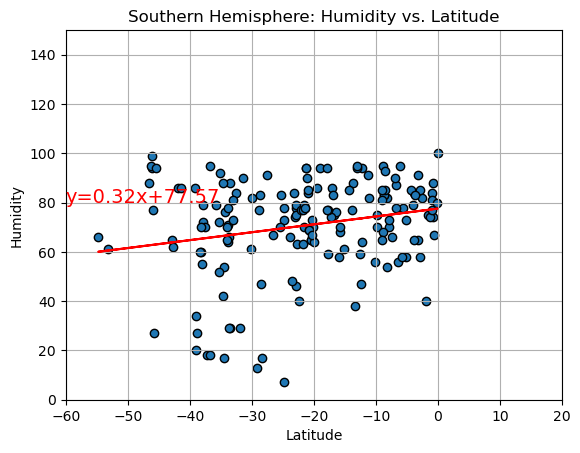

In [26]:
# Southern Hemisphere
x_values=southern_hemi_df["Lat"]
y_values=southern_hemi_df["Humidity"]
plt.scatter(x_values,y_values, edgecolors= "black")
plt.title("Southern Hemisphere: Humidity vs. Latitude")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid()
plt.ylim(0,150)
plt.xlim(-60,20)
(slope, intercept, rvalue,pvalue,std_err) = linregress(x_values,y_values)
slope=round(slope,2)
intercept=round(intercept,2)
line_str=f"y={slope}x+{intercept}"
plt.annotate(line_str,(-60,80), fontsize=14,color="red")
predicted_value=x_values*slope+intercept
plt.plot(x_values,predicted_value,"r-")
print("The rvalue is " + str( rvalue**2))

### Cloudiness vs. Latitude Linear Regression Plot

The rvalue is 0.08015698027883808


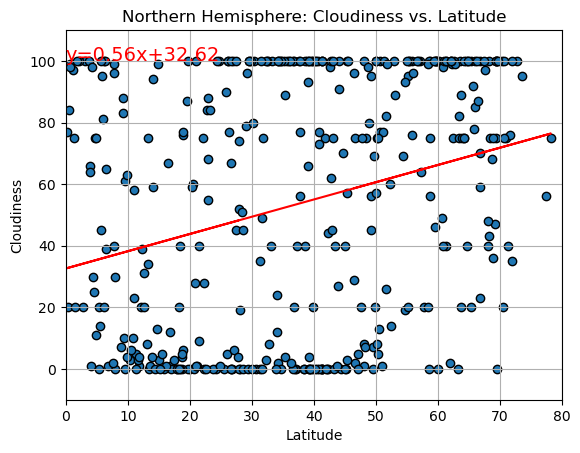

In [20]:
# Northern Hemisphere
x_values=northern_hemi_df["Lat"]
y_values=northern_hemi_df["Cloudiness"]
plt.scatter(x_values,y_values, edgecolors= "black")
plt.title("Northern Hemisphere: Cloudiness vs. Latitude")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid()
plt.ylim(-10,110)
plt.xlim(0,80)
(slope, intercept, rvalue,pvalue,std_err) = linregress(x_values,y_values)
slope=round(slope,2)
intercept=round(intercept,2)
line_str=f"y={slope}x+{intercept}"
plt.annotate(line_str,(0,100), fontsize=14, color="red")
predicted_value=x_values*slope+intercept
plt.plot(x_values,predicted_value,"r-")
print("The rvalue is " + str( rvalue**2))

The rvalue is 0.300987665066878


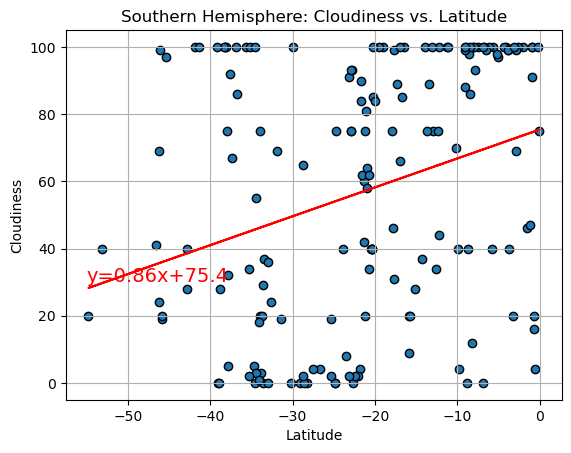

In [21]:
# Southern Hemisphere
x_values=southern_hemi_df["Lat"]
y_values=southern_hemi_df["Cloudiness"]
plt.scatter(x_values,y_values, edgecolors= "black")
plt.title("Southern Hemisphere: Cloudiness vs. Latitude")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid()
(slope, intercept, rvalue,pvalue,std_err) = linregress(x_values,y_values)
slope=round(slope,2)
intercept=round(intercept,2)
line_str=f"y={slope}x+{intercept}"
plt.annotate(line_str,(-55,30), fontsize=14,color="red")
predicted_value=x_values*slope+intercept
plt.plot(x_values,predicted_value,"r-")
print("The rvalue is " + str( rvalue))

### Wind Speed vs. Latitude Linear Regression Plot

The rvalue is 0.004421938890177399


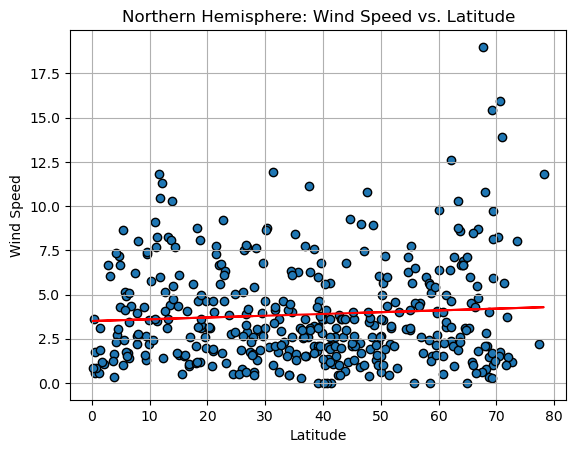

In [22]:
# Northern Hemisphere
x_values=northern_hemi_df["Lat"]
y_values=northern_hemi_df["Wind Speed"]
plt.scatter(x_values,y_values, edgecolors= "black")
plt.title("Northern Hemisphere: Wind Speed vs. Latitude")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid()

(slope, intercept, rvalue,pvalue,std_err) = linregress(x_values,y_values)
slope=round(slope,2)
intercept=round(intercept,2)
line_str=f"y={slope}x+{intercept}"
plt.annotate(line_str,(0,20), fontsize=14,color="red")
predicted_value=x_values*slope+intercept
plt.plot(x_values,predicted_value,"r-")
print("The rvalue is " + str( rvalue**2))

The rvalue is 0.023362167830169162


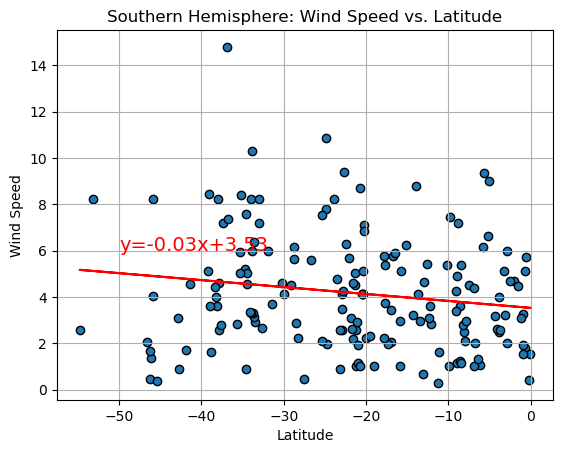

In [23]:
# Southern Hemisphere
x_values=southern_hemi_df["Lat"]
y_values=southern_hemi_df["Wind Speed"]
plt.scatter(x_values,y_values, edgecolors= "black")
plt.title("Southern Hemisphere: Wind Speed vs. Latitude")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid()

(slope, intercept, rvalue,pvalue,std_err) = linregress(x_values,y_values)
slope=round(slope,2)
intercept=round(intercept,2)
line_str=f"y={slope}x+{intercept}"
plt.annotate(line_str,(-50,6), fontsize=14,color="red")
predicted_value=x_values*slope+intercept
plt.plot(x_values,predicted_value,"r-")
print("The rvalue is " + str( rvalue**2))